In [8]:
# Import des bibliothèques 
# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [5]:
#Définition du gradient 
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [12]:
#Définition de la Jacobienne
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [9]:
#Implémentation de display_contour 
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

### Fonctions quadratiques 

In [6]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

### Question 1

On a posé $c \in \mathbb{R}$, supposé la fonction $f:\mathbb{R}^2 \to \mathbb{R}$ continue, et telle que
$f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$.

Premièrement, l'ensemble de niveau $c$ de $f$ est un ensemble fermé car c'est l'image réciproque de l'ensemble fermé $\{c\}$ par une fonction continue.

On a également l'équivalence entre les enoncés :

$(i)$ L'ensemble de niveau $c$ est non vide

$(ii)$ $c \ge  \underset{(x_1,x_2) \in \mathbb{R^{2}}}{\text{inf}} f(x_1,x_2)$ (Cette borne inférieure est atteinte.)



### Question 2
Au voisinage du point $x_0 = (x_{10}, x_{20}) \in \mathbb{R}^2$ où le gradient de $f$ ne s'annule pas, on pose :
$$
p(x_1, x_2) := \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}).
$$


On remarque que 
$$
p(x_1, x_2) := \frac{1}{\|\nabla f(x_0)\|} \cdot 
\|\begin{pmatrix}
x_1-x_{10} \\
x_2-x_{20}\\
0
\end{pmatrix}
\wedge
\begin{pmatrix}
\partial_1 f(x_0) \\
 \partial_2 f(x_0)\\
0
\end{pmatrix}\|
$$

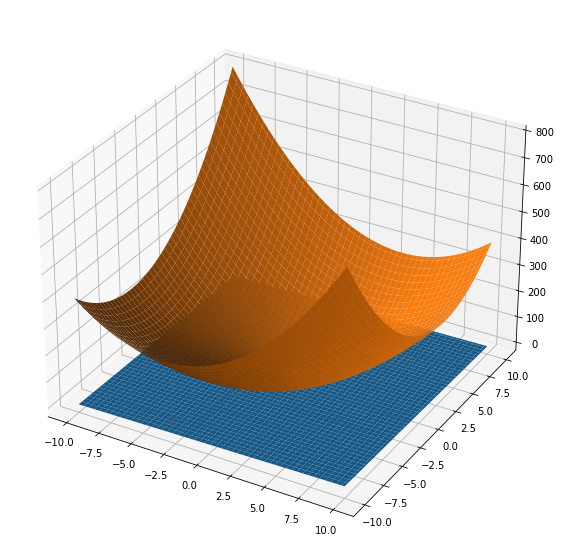

In [13]:
def p(f,x10 ,x20 ,x1 ,x2 ):
    '''Implémentation Python de la fonction p.
    f : fonction en question
    x10, x20 : coordonnées du point x0
    x1, x2 : coordonnées d'évaluation de la fonction p'''
    grad_f = grad(f)
    gradx0= grad_f(x10,x20)
    d1=gradx0[0]
    d2=gradx0[1]
    norme=(d1*d1+d2*d2)**(1/2)
    return (d2*(x1-x10)/norme) - (d1*(x2-x20)/norme)

fig=plt.figure()
ax=fig.gca(projection='3d')
x = np.linspace(-10,10.0,100)
X, Y = np.meshgrid(x, x)
Z = p(f1,1.0,1.0,X, Y)
W = f1(X,Y)
surf = ax.plot_surface(X,Y,Z)
board = ax.plot_surface(X,Y,W)
plt.show()


### Question 3
On pose:

$$
g : (x,t) \in  \mathbb{R^2}\times \mathbb{R} \mapsto \begin{pmatrix}
f(x) - c \\
p(x) - r
\end{pmatrix}\in \mathbb{R^2}
$$
 - g est continûment différentiable : 
$$ 
  J_g=\begin{pmatrix}
\partial_1 g_1 &\partial_2 g_1  & \partial_3 g_1  \\
 \partial_1 g_2& \partial_2 g_2 & \partial_3 g_2
\end{pmatrix}
= \begin{pmatrix}
\partial_1 f & \partial_2 f & 0 \\
 \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}& -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|}  & -1
\end{pmatrix}
$$
 Effectivement, les dérivées partielles de $g_1$ et $g_2$ existent et sont continue car $f$ est elle même continûment différentiable.


 - Inversibilité de $\partial_x g$:
 

$$
\partial_x g(x,t) = \begin{pmatrix}
\partial_1f &\partial_2f  \\
\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}& -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} 
\end{pmatrix}
$$


D'où:


$$
det (\partial_x g(x,t)) = - \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}\partial_1f(x) - \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}\partial_2f(x)
$$

Donc :

$$
\forall t \in \mathbb{R}, det (\partial_x g(x_0,t))= - \|\nabla f(x_0)\| \neq 0
\
\
$$


Ainsi, par continuité du déterminant, il existe $Q$ un voisinage de $x_0$ dans lequel $\partial_x g(x,t)$ est inversible pour tout t. Ainsi, il existe un ouvert  $W = Q \times \mathbb{R}$, tel que $\partial_xg$ soit inversible. 

Par le théorème des fonctions implicites il existe donc des voisinages ouverts $U$ de $x_0$ et V de $t_0$ tel que $t_0 = p(x_0)$, tels que $U \times V \subset W$ et une unique fonction $\gamma : V \to \mathbb{R^2}$ continûment différentiable telle que $\forall t \in V$ et $\forall x \in U$ :

$$
g(x,t)=0 \Leftrightarrow 
x = \gamma (t) = \gamma(p(x))
$$

Ainsi, nous obtenons l'équivalence suivante: 

$$
f(x,t)=c \Leftrightarrow 
x = \gamma (t) \ où \ t=p(x)
$$



### Question 5

Nous choisissons $\varepsilon = 2^{-52}$ car il s'agit de la plus petite différence entre des doubles détectable par l'ordinateur (epsilon machine).

In [2]:
N = 100
eps = 2^(-52)

### Tâche 1
Implémentation python de la recherche de zéro par méthode de Newton pour une fonction $F:\mathbb{R}^{2}\longrightarrow \mathbb{R}$

In [18]:
def Newton(F, x0, y0, eps=eps, N=N):
    x,y=x0,y0
    X=np.array([x,y])
    J_F = J(F)
    for i in range(N):
        inv = np.linalg.inv(J_F(x,y))
        X = X - inv.dot(F(x,y))
        x,y = X[0], X[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

### Tâche 2

On définit la fonction: 

$$
f_{11} : (x_1,x_2) \in  \mathbb{R^2} \mapsto 
\begin{pmatrix}
f_1(x_1,x_2) \\x_1-x_2

\end{pmatrix}
$$

Lorsque $f$ s'annule, on a alors $x_1 = x_2$.


In [23]:
def f11(x1,x2):
    f11 = np.array([f1(x1,x2), x1-x2])
    return f11

X = Newton(f1, 0.8, 0.8, eps = eps, N=N)
print(X)


[2.56 0.  ]


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional